In [49]:
import mysql.connector 
import pandas as pd

In [50]:

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="04101998",
  database="gravity_books"
)

mycursor = mydb.cursor()
mycursor.execute("SHOW tables")

In [51]:
for x in mycursor:
  print(x)

('address',)
('address_status',)
('author',)
('book',)
('book_author',)
('book_language',)
('country',)
('cust_order',)
('customer',)
('customer_address',)
('order_history',)
('order_line',)
('order_status',)
('publisher',)
('shipping_method',)


In [52]:
query1 = "SELECT * FROM cust_order"
query2 = "SELECT * FROM customer"
query3 = "SELECT * FROM order_history"
query4 = "SELECT * FROM customer_address"
query5 = "SELECT * FROM order_line"


In [53]:
cust_order_df= pd.read_sql(query1,con=mydb)
customer_df=pd.read_sql(query2,con=mydb)
order_history_df=pd.read_sql(query3,con=mydb)
customer_address_df=pd.read_sql(query4,con=mydb)
order_line_df=pd.read_sql(query5,con=mydb)

C:\Users\rmari\AppData\Local\Temp\ipykernel_27764\3510441417.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cust_order_df= pd.read_sql(query1,con=mydb)
C:\Users\rmari\AppData\Local\Temp\ipykernel_27764\3510441417.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  customer_df=pd.read_sql(query2,con=mydb)
C:\Users\rmari\AppData\Local\Temp\ipykernel_27764\3510441417.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  order_history_df=pd.read_sql(query3,con=mydb)


C:\Users\rmari\AppData\Local\Temp\ipykernel_27764\3510441417.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  customer_address_df=pd.read_sql(query4,con=mydb)
C:\Users\rmari\AppData\Local\Temp\ipykernel_27764\3510441417.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  order_line_df=pd.read_sql(query5,con=mydb)


In [54]:
cust_order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7550 entries, 0 to 7549
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            7550 non-null   int64         
 1   order_date          7550 non-null   datetime64[ns]
 2   customer_id         7550 non-null   int64         
 3   shipping_method_id  7550 non-null   int64         
 4   dest_address_id     7550 non-null   int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 295.1 KB


In [55]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  2000 non-null   int64 
 1   first_name   2000 non-null   object
 2   last_name    2000 non-null   object
 3   email        2000 non-null   object
dtypes: int64(1), object(3)
memory usage: 62.6+ KB


In [56]:
order_history_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22345 entries, 0 to 22344
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   history_id   22345 non-null  int64         
 1   order_id     22345 non-null  int64         
 2   status_id    22345 non-null  int64         
 3   status_date  22345 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 698.4 KB


In [57]:
customer_address_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3350 entries, 0 to 3349
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   customer_id  3350 non-null   int64
 1   address_id   3350 non-null   int64
 2   status_id    3350 non-null   int64
dtypes: int64(3)
memory usage: 78.6 KB


In [58]:
order_line_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15400 entries, 0 to 15399
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   line_id   15400 non-null  int64  
 1   order_id  15400 non-null  int64  
 2   book_id   15400 non-null  int64  
 3   price     15400 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 481.4 KB


In [59]:
cust_order_df.to_csv("cust_order.csv",index=False)
customer_df.to_csv("customer.csv",index=False)
order_history_df.to_csv("order_history.csv",index=False)
order_line_df.to_csv("order_line.csv",index=False)
customer_address_df.to_csv("customer_address.csv",index=False)

In [60]:
import os
import pandas as pd

# Step 1: Folder containing all your CSV files
folder_path = 'D:/santhanam/FINEL'  # 🔁 Replace with your actual folder path

# Step 2: List all CSV files
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Step 3: Load all CSVs into a dictionary
dataframes = {}
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    try:
        df = pd.read_csv(file_path)
        dataframes[file] = df
        print(f"✅ Loaded {file} | Columns: {list(df.columns)}")
    except Exception as e:
        print(f"❌ Error reading {file}: {e}")

# Step 4: Merge all DataFrames using inner join on common columns
merged_df = None

for filename, df in dataframes.items():
    if merged_df is None:
        merged_df = df
        print(f"\n🔄 Starting with {filename}")
    else:
        # Find common columns
        common_cols = list(set(merged_df.columns).intersection(df.columns))
        
        if common_cols:
            print(f"🔗 Merging {filename} on {common_cols}")
            merged_df = pd.merge(merged_df, df, on=common_cols, how='inner')
        else:
            print(f"⚠️ Skipping {filename} — No common columns found")

# Step 5: Final output
if merged_df is not None:
    print(f"\n✅ Inner join complete! Final shape: {merged_df.shape}")
   
else:
    print("❌ No merges performed. Check your files for common columns.")


✅ Loaded customer.csv | Columns: ['customer_id', 'first_name', 'last_name', 'email']
✅ Loaded customer_address.csv | Columns: ['customer_id', 'address_id', 'status_id']
✅ Loaded cust_order.csv | Columns: ['order_id', 'order_date', 'customer_id', 'shipping_method_id', 'dest_address_id']
✅ Loaded order_history.csv | Columns: ['history_id', 'order_id', 'status_id', 'status_date']
✅ Loaded order_line.csv | Columns: ['line_id', 'order_id', 'book_id', 'price']

🔄 Starting with customer.csv
🔗 Merging customer_address.csv on ['customer_id']
🔗 Merging cust_order.csv on ['customer_id']
🔗 Merging order_history.csv on ['order_id', 'status_id']
🔗 Merging order_line.csv on ['order_id']

✅ Inner join complete! Final shape: (31130, 15)


In [61]:
merged_df

,customer_id,first_name,last_name,email,address_id,status_id,order_id,order_date,shipping_method_id,dest_address_id,history_id,status_date,line_id,book_id,price
0,1,Ursola,Purdy,upurdy0@cdbaby.com,55,1,1405,2023-02-25 19:31:24,4,235,1402,2023-02-25 23:24:35,1,1505,10.12
1,1,Ursola,Purdy,upurdy0@cdbaby.com,55,1,1405,2023-02-25 19:31:24,4,235,1402,2023-02-25 23:24:35,14828,1145,6.49
2,1,Ursola,Purdy,upurdy0@cdbaby.com,55,1,1505,2023-12-17 11:56:21,2,55,1502,2023-12-17 18:51:11,2,1389,2.11
3,1,Ursola,Purdy,upurdy0@cdbaby.com,55,1,5325,2023-12-07 20:25:34,3,235,3725,2023-12-07 22:33:56,3,1705,8.99
4,1,Ursola,Purdy,upurdy0@cdbaby.com,55,1,5325,2023-12-07 20:25:34,3,235,3725,2023-12-07 22:33:56,10463,8120,14.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31125,1999,Ardeen,Caret,acaretrq@wsj.com,925,1,10595,2022-11-20 16:56:25,1,74,7055,2022-11-21 03:17:36,14512,6276,14.99
31126,2000,Delora,Bigglestone,dbigglestonerr@usatoday.com,477,1,869,2025-07-09 23:38:59,2,477,868,2025-07-10 04:40:03,7549,3748,19.14
31127,2000,Delora,Bigglestone,dbigglestonerr@usatoday.com,477,1,869,2025-07-09 23:38:59,2,477,868,2025-07-10 04:40:03,14763,340,19.70
31128,2000,Delora,Bigglestone,dbigglestonerr@usatoday.com,477,1,7303,2022-11-15 21:01:01,3,477,5156,2022-11-16 02:05:23,7550,8617,0.02


In [62]:
for column in merged_df :
    print(f'{column} : {merged_df[column].unique()}' )

customer_id : [   1    2    3 ... 1998 1999 2000]
first_name : ['Ursola' 'Ruthanne' 'Reidar' ... 'Janean' 'Georgeanna' 'Delora']
last_name : ['Purdy' 'Vatini' 'Turbitt' ... 'Garman' 'Caret' 'Bigglestone']
email : ['upurdy0@cdbaby.com' 'rvatini1@fema.gov' 'rturbitt2@geocities.jp' ...
 'ggarmanrp@surveymonkey.com' 'acaretrq@wsj.com'
 'dbigglestonerr@usatoday.com']
address_id : [  55  235  650  553  397  481  981  152  788  320   43  541  862  943
  491  531  966  485  582  779  414  620  958  241  371  897  629  782
  884  158  384  780  998  920  327  516  160  192  370  814  892  985
  360  450  616   85  396  930  992   29  373  468  863   59  297  605
  574  203   53  667  249  748  808  231  611  222  439  832  514  643
  734  357  592   96  463  767  841  923  720  452  129  375  806  809
  671  969  470  559  865  928  567   78  621  173  243  682  199  266
  654   64   80  436  380  804  874  415  126  719  836   49  875   51
   83  427  991  113  914   22  961  566  724  815  76

In [63]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31130 entries, 0 to 31129
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         31130 non-null  int64  
 1   first_name          31130 non-null  object 
 2   last_name           31130 non-null  object 
 3   email               31130 non-null  object 
 4   address_id          31130 non-null  int64  
 5   status_id           31130 non-null  int64  
 6   order_id            31130 non-null  int64  
 7   order_date          31130 non-null  object 
 8   shipping_method_id  31130 non-null  int64  
 9   dest_address_id     31130 non-null  int64  
 10  history_id          31130 non-null  int64  
 11  status_date         31130 non-null  object 
 12  line_id             31130 non-null  int64  
 13  book_id             31130 non-null  int64  
 14  price               31130 non-null  float64
dtypes: float64(1), int64(9), object(5)
memory usage: 3.6+

In [64]:
merged_df.isnull().sum()

customer_id           0
first_name            0
last_name             0
email                 0
address_id            0
status_id             0
order_id              0
order_date            0
shipping_method_id    0
dest_address_id       0
history_id            0
status_date           0
line_id               0
book_id               0
price                 0
dtype: int64

In [65]:
merged_df.drop_duplicates(inplace=True)

In [66]:
merged_df

,customer_id,first_name,last_name,email,address_id,status_id,order_id,order_date,shipping_method_id,dest_address_id,history_id,status_date,line_id,book_id,price
0,1,Ursola,Purdy,upurdy0@cdbaby.com,55,1,1405,2023-02-25 19:31:24,4,235,1402,2023-02-25 23:24:35,1,1505,10.12
1,1,Ursola,Purdy,upurdy0@cdbaby.com,55,1,1405,2023-02-25 19:31:24,4,235,1402,2023-02-25 23:24:35,14828,1145,6.49
2,1,Ursola,Purdy,upurdy0@cdbaby.com,55,1,1505,2023-12-17 11:56:21,2,55,1502,2023-12-17 18:51:11,2,1389,2.11
3,1,Ursola,Purdy,upurdy0@cdbaby.com,55,1,5325,2023-12-07 20:25:34,3,235,3725,2023-12-07 22:33:56,3,1705,8.99
4,1,Ursola,Purdy,upurdy0@cdbaby.com,55,1,5325,2023-12-07 20:25:34,3,235,3725,2023-12-07 22:33:56,10463,8120,14.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31125,1999,Ardeen,Caret,acaretrq@wsj.com,925,1,10595,2022-11-20 16:56:25,1,74,7055,2022-11-21 03:17:36,14512,6276,14.99
31126,2000,Delora,Bigglestone,dbigglestonerr@usatoday.com,477,1,869,2025-07-09 23:38:59,2,477,868,2025-07-10 04:40:03,7549,3748,19.14
31127,2000,Delora,Bigglestone,dbigglestonerr@usatoday.com,477,1,869,2025-07-09 23:38:59,2,477,868,2025-07-10 04:40:03,14763,340,19.70
31128,2000,Delora,Bigglestone,dbigglestonerr@usatoday.com,477,1,7303,2022-11-15 21:01:01,3,477,5156,2022-11-16 02:05:23,7550,8617,0.02


In [67]:
for column in merged_df :
    print(f'{column} : {merged_df[column].unique()}' )

customer_id : [   1    2    3 ... 1998 1999 2000]
first_name : ['Ursola' 'Ruthanne' 'Reidar' ... 'Janean' 'Georgeanna' 'Delora']
last_name : ['Purdy' 'Vatini' 'Turbitt' ... 'Garman' 'Caret' 'Bigglestone']
email : ['upurdy0@cdbaby.com' 'rvatini1@fema.gov' 'rturbitt2@geocities.jp' ...
 'ggarmanrp@surveymonkey.com' 'acaretrq@wsj.com'
 'dbigglestonerr@usatoday.com']
address_id : [  55  235  650  553  397  481  981  152  788  320   43  541  862  943
  491  531  966  485  582  779  414  620  958  241  371  897  629  782
  884  158  384  780  998  920  327  516  160  192  370  814  892  985
  360  450  616   85  396  930  992   29  373  468  863   59  297  605
  574  203   53  667  249  748  808  231  611  222  439  832  514  643
  734  357  592   96  463  767  841  923  720  452  129  375  806  809
  671  969  470  559  865  928  567   78  621  173  243  682  199  266
  654   64   80  436  380  804  874  415  126  719  836   49  875   51
   83  427  991  113  914   22  961  566  724  815  76

In [68]:
from scipy.stats import zscore

# Select numeric columns only
numeric_cols = merged_df.select_dtypes(include=['number']).columns

# Calculate z-scores only for numeric columns
merged_df_z = merged_df[numeric_cols].apply(zscore)

# Identify outliers in each numeric column (abs(z) > 3)
outliers = (merged_df_z.abs() > 3)


In [69]:
merged_df

,customer_id,first_name,last_name,email,address_id,status_id,order_id,order_date,shipping_method_id,dest_address_id,history_id,status_date,line_id,book_id,price
0,1,Ursola,Purdy,upurdy0@cdbaby.com,55,1,1405,2023-02-25 19:31:24,4,235,1402,2023-02-25 23:24:35,1,1505,10.12
1,1,Ursola,Purdy,upurdy0@cdbaby.com,55,1,1405,2023-02-25 19:31:24,4,235,1402,2023-02-25 23:24:35,14828,1145,6.49
2,1,Ursola,Purdy,upurdy0@cdbaby.com,55,1,1505,2023-12-17 11:56:21,2,55,1502,2023-12-17 18:51:11,2,1389,2.11
3,1,Ursola,Purdy,upurdy0@cdbaby.com,55,1,5325,2023-12-07 20:25:34,3,235,3725,2023-12-07 22:33:56,3,1705,8.99
4,1,Ursola,Purdy,upurdy0@cdbaby.com,55,1,5325,2023-12-07 20:25:34,3,235,3725,2023-12-07 22:33:56,10463,8120,14.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31125,1999,Ardeen,Caret,acaretrq@wsj.com,925,1,10595,2022-11-20 16:56:25,1,74,7055,2022-11-21 03:17:36,14512,6276,14.99
31126,2000,Delora,Bigglestone,dbigglestonerr@usatoday.com,477,1,869,2025-07-09 23:38:59,2,477,868,2025-07-10 04:40:03,7549,3748,19.14
31127,2000,Delora,Bigglestone,dbigglestonerr@usatoday.com,477,1,869,2025-07-09 23:38:59,2,477,868,2025-07-10 04:40:03,14763,340,19.70
31128,2000,Delora,Bigglestone,dbigglestonerr@usatoday.com,477,1,7303,2022-11-15 21:01:01,3,477,5156,2022-11-16 02:05:23,7550,8617,0.02


In [70]:
for column in merged_df :
    print(f'{column} : {merged_df[column].unique()}' )

customer_id : [   1    2    3 ... 1998 1999 2000]
first_name : ['Ursola' 'Ruthanne' 'Reidar' ... 'Janean' 'Georgeanna' 'Delora']
last_name : ['Purdy' 'Vatini' 'Turbitt' ... 'Garman' 'Caret' 'Bigglestone']
email : ['upurdy0@cdbaby.com' 'rvatini1@fema.gov' 'rturbitt2@geocities.jp' ...
 'ggarmanrp@surveymonkey.com' 'acaretrq@wsj.com'
 'dbigglestonerr@usatoday.com']
address_id : [  55  235  650  553  397  481  981  152  788  320   43  541  862  943
  491  531  966  485  582  779  414  620  958  241  371  897  629  782
  884  158  384  780  998  920  327  516  160  192  370  814  892  985
  360  450  616   85  396  930  992   29  373  468  863   59  297  605
  574  203   53  667  249  748  808  231  611  222  439  832  514  643
  734  357  592   96  463  767  841  923  720  452  129  375  806  809
  671  969  470  559  865  928  567   78  621  173  243  682  199  266
  654   64   80  436  380  804  874  415  126  719  836   49  875   51
   83  427  991  113  914   22  961  566  724  815  76

In [71]:
# === 1. Convert datetime columns ===
merged_df['order_date'] = pd.to_datetime(merged_df['order_date'])
merged_df['status_date'] = pd.to_datetime(merged_df['status_date'])

# === 2. Extract datetime features ===
merged_df['order_dayofweek'] = merged_df['order_date'].dt.dayofweek
merged_df['order_month'] = merged_df['order_date'].dt.month
merged_df['order_hour'] = merged_df['order_date'].dt.hour
merged_df['order_year'] = merged_df['order_date'].dt.year

merged_df['status_dayofweek'] = merged_df['status_date'].dt.dayofweek
merged_df['status_month'] = merged_df['status_date'].dt.month
merged_df['status_hour'] = merged_df['status_date'].dt.hour
merged_df['status_year'] = merged_df['status_date'].dt.year

# === 3. Create interaction features ===
merged_df['order_to_status_delay_hrs'] = (merged_df['status_date'] - merged_df['order_date']).dt.total_seconds() / 3600

# === 4. Customer-level aggregations ===
customer_order_counts = merged_df.groupby('customer_id')['order_id'].nunique().reset_index(name='total_orders')
customer_avg_price = merged_df.groupby('customer_id')['price'].mean().reset_index(name='avg_price_per_customer')

merged_df = merged_df.merge(customer_order_counts, on='customer_id', how='left')
merged_df= merged_df.merge(customer_avg_price, on='customer_id', how='left')

# === 5. Flag high-priced items (optional outlier flag) ===
Q1 = merged_df['price'].quantile(0.25)
Q3 = merged_df['price'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR

merged_df['high_price_flag'] = (merged_df['price'] > upper).astype(int)

merged_df = merged_df.drop(columns=['first_name', 'last_name','email'])


In [72]:
merged_df.isnull().sum()

customer_id                  0
address_id                   0
status_id                    0
order_id                     0
order_date                   0
shipping_method_id           0
dest_address_id              0
history_id                   0
status_date                  0
line_id                      0
book_id                      0
price                        0
order_dayofweek              0
order_month                  0
order_hour                   0
order_year                   0
status_dayofweek             0
status_month                 0
status_hour                  0
status_year                  0
order_to_status_delay_hrs    0
total_orders                 0
avg_price_per_customer       0
high_price_flag              0
dtype: int64

In [73]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31130 entries, 0 to 31129
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   customer_id                31130 non-null  int64         
 1   address_id                 31130 non-null  int64         
 2   status_id                  31130 non-null  int64         
 3   order_id                   31130 non-null  int64         
 4   order_date                 31130 non-null  datetime64[ns]
 5   shipping_method_id         31130 non-null  int64         
 6   dest_address_id            31130 non-null  int64         
 7   history_id                 31130 non-null  int64         
 8   status_date                31130 non-null  datetime64[ns]
 9   line_id                    31130 non-null  int64         
 10  book_id                    31130 non-null  int64         
 11  price                      31130 non-null  float64       
 12  orde

In [74]:
pd.set_option('display.max_columns', None)

In [75]:
merged_df

,customer_id,address_id,status_id,order_id,order_date,shipping_method_id,dest_address_id,history_id,status_date,line_id,book_id,price,order_dayofweek,order_month,order_hour,order_year,status_dayofweek,status_month,status_hour,status_year,order_to_status_delay_hrs,total_orders,avg_price_per_customer,high_price_flag
0,1,55,1,1405,2023-02-25 19:31:24,4,235,1402,2023-02-25 23:24:35,1,1505,10.12,5,2,19,2023,5,2,23,2023,3.886389,3,8.350000,0
1,1,55,1,1405,2023-02-25 19:31:24,4,235,1402,2023-02-25 23:24:35,14828,1145,6.49,5,2,19,2023,5,2,23,2023,3.886389,3,8.350000,0
2,1,55,1,1505,2023-12-17 11:56:21,2,55,1502,2023-12-17 18:51:11,2,1389,2.11,6,12,11,2023,6,12,18,2023,6.913889,3,8.350000,0
3,1,55,1,5325,2023-12-07 20:25:34,3,235,3725,2023-12-07 22:33:56,3,1705,8.99,3,12,20,2023,3,12,22,2023,2.139444,3,8.350000,0
4,1,55,1,5325,2023-12-07 20:25:34,3,235,3725,2023-12-07 22:33:56,10463,8120,14.11,3,12,20,2023,3,12,22,2023,2.139444,3,8.350000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31125,1999,925,1,10595,2022-11-20 16:56:25,1,74,7055,2022-11-21 03:17:36,14512,6276,14.99,6,11,16,2022,0,11,3,2022,10.353056,11,10.889593,0
31126,2000,477,1,869,2025-07-09 23:38:59,2,477,868,2025-07-10 04:40:03,7549,3748,19.14,2,7,23,2025,3,7,4,2025,5.017778,2,10.132500,0
31127,2000,477,1,869,2025-07-09 23:38:59,2,477,868,2025-07-10 04:40:03,14763,340,19.70,2,7,23,2025,3,7,4,2025,5.017778,2,10.132500,0
31128,2000,477,1,7303,2022-11-15 21:01:01,3,477,5156,2022-11-16 02:05:23,7550,8617,0.02,1,11,21,2022,2,11,2,2022,5.072778,2,10.132500,0


In [76]:
for column in merged_df :
    print(f'{column} : {merged_df[column].unique()}' )

customer_id : [   1    2    3 ... 1998 1999 2000]
address_id : [  55  235  650  553  397  481  981  152  788  320   43  541  862  943
  491  531  966  485  582  779  414  620  958  241  371  897  629  782
  884  158  384  780  998  920  327  516  160  192  370  814  892  985
  360  450  616   85  396  930  992   29  373  468  863   59  297  605
  574  203   53  667  249  748  808  231  611  222  439  832  514  643
  734  357  592   96  463  767  841  923  720  452  129  375  806  809
  671  969  470  559  865  928  567   78  621  173  243  682  199  266
  654   64   80  436  380  804  874  415  126  719  836   49  875   51
   83  427  991  113  914   22  961  566  724  815  768  471  584  163
  416  560  622  681  747  103  751  758  826  107  750  264   35  440
   63  700  999  755  996  308  321  598  752  935  166  277  312  641
   18  917  968  500  835  900  341  906  215  345  896  252  322  972
   46  140  600  548  791  381  955  626  964  317  609  150  521  232
  123  133  46

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [78]:
# ----- Generate Statistics -----
stats = merged_df.describe()  # Summary statistics for all columns
print("=== Summary Statistics ===")
print(stats)


=== Summary Statistics ===
       customer_id    address_id     status_id      order_id  \
count  31130.00000  31130.000000  31130.000000  31130.000000   
mean     998.60302    511.531931      1.148378   5406.699358   
min        1.00000      1.000000      1.000000      1.000000   
25%      513.00000    259.000000      1.000000   1863.250000   
50%     1007.50000    514.000000      1.000000   5348.000000   
75%     1488.00000    765.000000      1.000000   8633.000000   
max     2000.00000   1000.000000      2.000000  11434.000000   
std      573.19417    291.574955      0.355480   3478.502607   

                          order_date  shipping_method_id  dest_address_id  \
count                          31130        31130.000000     31130.000000   
mean   2024-01-27 20:19:50.731673344            2.523836       512.461259   
min              2022-08-06 08:21:23            1.000000         1.000000   
25%              2023-04-23 09:46:48            2.000000       260.000000   
50%        

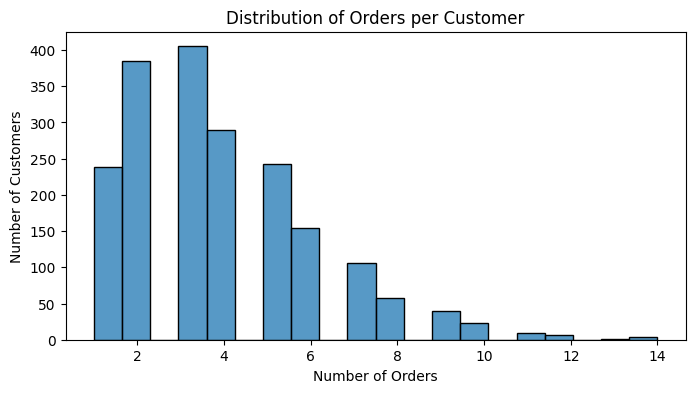

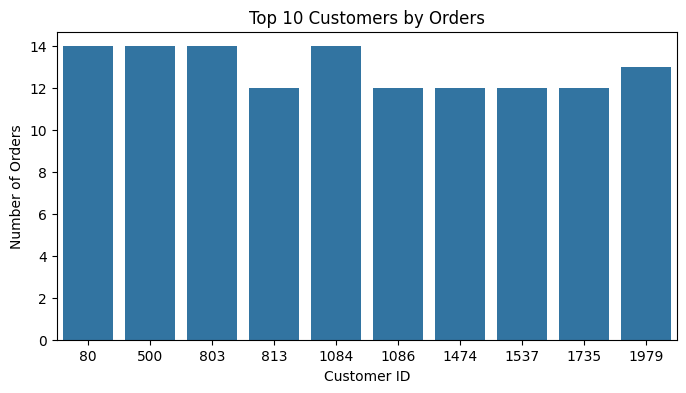

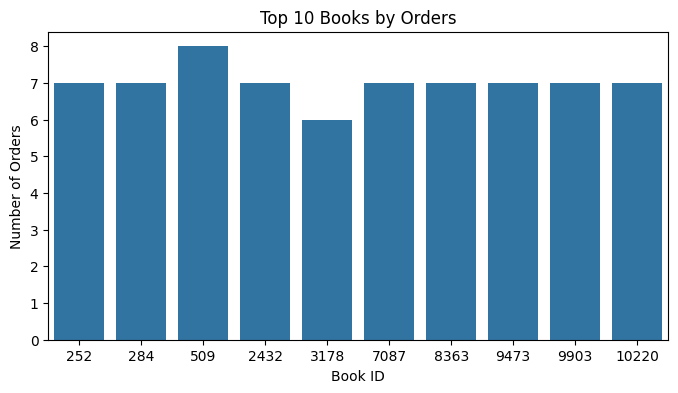

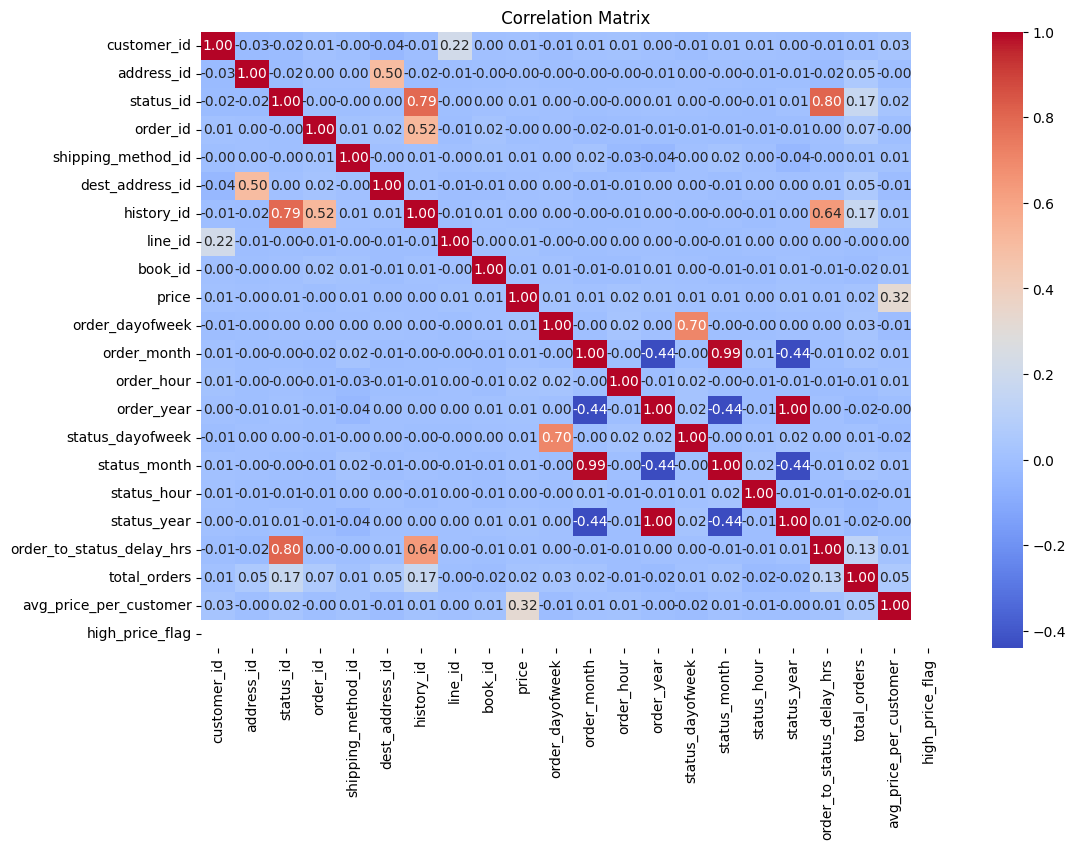

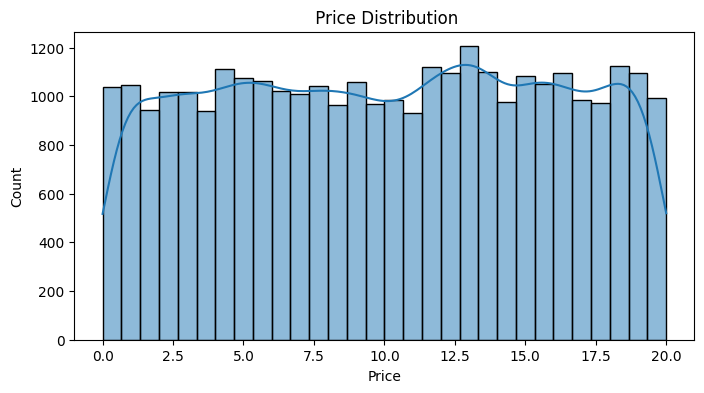

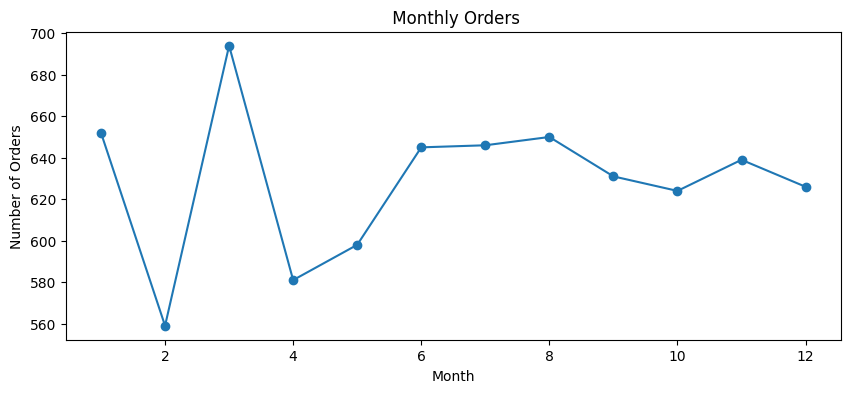

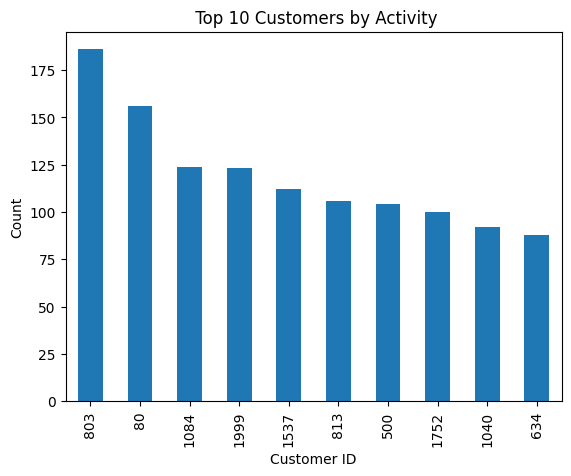

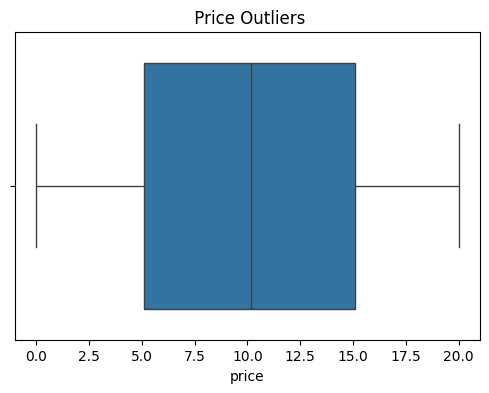

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure date column is in datetime format
merged_df['order_date'] = pd.to_datetime(merged_df['order_date'])

# --- 1. Orders per Customer ---
orders_per_customer = merged_df.groupby('customer_id')['order_id'].nunique().reset_index()
plt.figure(figsize=(8, 4))
sns.histplot(orders_per_customer['order_id'], bins=20, kde=False)
plt.title('Distribution of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()

# --- 2. Top Customers by Total Orders ---
top_customers = orders_per_customer.sort_values('order_id', ascending=False).head(10)
plt.figure(figsize=(8, 4))
sns.barplot(x='customer_id', y='order_id', data=top_customers)
plt.title('Top 10 Customers by Orders')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.show()

# --- 3. Orders per Book ---
orders_per_book = merged_df.groupby('book_id')['order_id'].nunique().reset_index()
top_books = orders_per_book.sort_values('order_id', ascending=False).head(10)
plt.figure(figsize=(8, 4))
sns.barplot(x='book_id', y='order_id', data=top_books)
plt.title('Top 10 Books by Orders')
plt.xlabel('Book ID')
plt.ylabel('Number of Orders')
plt.show()
plt.figure(figsize=(12, 8))
sns.heatmap(merged_df.select_dtypes(include=np.number).corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title(" Correlation Matrix")
plt.show()

# === 7. Distribution of Target Variable (if any) ===
# Example: price
plt.figure(figsize=(8, 4))
sns.histplot(merged_df['price'], bins=30, kde=True)
plt.title(" Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

monthly_orders = merged_df.groupby('order_month')['order_id'].nunique()
monthly_orders.plot(kind='line', marker='o', figsize=(10, 4), title=' Monthly Orders')
plt.ylabel("Number of Orders")
plt.xlabel("Month")
plt.show()

# === 9. Top Customers by Orders ===
top_customers = merged_df['customer_id'].value_counts().head(10)
top_customers.plot(kind='bar', title=" Top 10 Customers by Activity")
plt.xlabel("Customer ID")
plt.ylabel("Count")
plt.show()

# === 10. Outliers in Price (Boxplot) ===
plt.figure(figsize=(6, 4))
sns.boxplot(x=merged_df['price'])
plt.title(" Price Outliers")
plt.show()

In [80]:
merged_df['churn'] = merged_df['status_id'].map({1: 0, 2: 1})


In [81]:
merged_df = merged_df.drop(columns=['order_date', 'status_date'])


In [82]:
merged_df

,customer_id,address_id,status_id,order_id,shipping_method_id,dest_address_id,history_id,line_id,book_id,price,order_dayofweek,order_month,order_hour,order_year,status_dayofweek,status_month,status_hour,status_year,order_to_status_delay_hrs,total_orders,avg_price_per_customer,high_price_flag,churn
0,1,55,1,1405,4,235,1402,1,1505,10.12,5,2,19,2023,5,2,23,2023,3.886389,3,8.350000,0,0
1,1,55,1,1405,4,235,1402,14828,1145,6.49,5,2,19,2023,5,2,23,2023,3.886389,3,8.350000,0,0
2,1,55,1,1505,2,55,1502,2,1389,2.11,6,12,11,2023,6,12,18,2023,6.913889,3,8.350000,0,0
3,1,55,1,5325,3,235,3725,3,1705,8.99,3,12,20,2023,3,12,22,2023,2.139444,3,8.350000,0,0
4,1,55,1,5325,3,235,3725,10463,8120,14.11,3,12,20,2023,3,12,22,2023,2.139444,3,8.350000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31125,1999,925,1,10595,1,74,7055,14512,6276,14.99,6,11,16,2022,0,11,3,2022,10.353056,11,10.889593,0,0
31126,2000,477,1,869,2,477,868,7549,3748,19.14,2,7,23,2025,3,7,4,2025,5.017778,2,10.132500,0,0
31127,2000,477,1,869,2,477,868,14763,340,19.70,2,7,23,2025,3,7,4,2025,5.017778,2,10.132500,0,0
31128,2000,477,1,7303,3,477,5156,7550,8617,0.02,1,11,21,2022,2,11,2,2022,5.072778,2,10.132500,0,0


In [83]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31130 entries, 0 to 31129
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                31130 non-null  int64  
 1   address_id                 31130 non-null  int64  
 2   status_id                  31130 non-null  int64  
 3   order_id                   31130 non-null  int64  
 4   shipping_method_id         31130 non-null  int64  
 5   dest_address_id            31130 non-null  int64  
 6   history_id                 31130 non-null  int64  
 7   line_id                    31130 non-null  int64  
 8   book_id                    31130 non-null  int64  
 9   price                      31130 non-null  float64
 10  order_dayofweek            31130 non-null  int32  
 11  order_month                31130 non-null  int32  
 12  order_hour                 31130 non-null  int32  
 13  order_year                 31130 non-null  int

In [84]:
from sklearn.preprocessing import StandardScaler
import joblib

# Separate features and target
X = merged_df.drop(columns=['churn'])  # All columns except target
y = merged_df['churn']                 # Target column

# Identify only numeric columns
num_cols = X.select_dtypes(include=['number']).columns

# Standardize numeric features
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Save the fitted scaler
joblib.dump(scaler, "scaler.pkl")
print("✅ Scaler saved as scaler.pkl")


✅ Scaler saved as scaler.pkl


In [85]:
y

0        0
1        0
2        0
3        0
4        0
        ..
31125    0
31126    0
31127    0
31128    0
31129    0
Name: churn, Length: 31130, dtype: int64

In [86]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [87]:
import tensorflow as tf

# ANN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary output for churn
])

# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=20,
                    batch_size=32)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Predict churn probability
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)


Epoch 1/20


c:\Users\rmari\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


779/779 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9919 - loss: 0.0278 - val_accuracy: 1.0000 - val_loss: 3.1177e-04
Epoch 2/20
779/779 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 1.5470e-04 - val_accuracy: 1.0000 - val_loss: 7.8186e-05
Epoch 3/20
779/779 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 4.9206e-05 - val_accuracy: 1.0000 - val_loss: 3.2590e-05
Epoch 4/20
779/779 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 2.2199e-05 - val_accuracy: 1.0000 - val_loss: 1.6462e-05
Epoch 5/20
779/779 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 1.1631e-05 - val_accuracy: 1.0000 - val_loss: 9.1484e-06
Epoch 6/20
779/779 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 6.5947e-06 - val_accuracy: 1.0000 - val_loss: 5.4081e-06
Epoch 7/20
779/779 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 3.9179e-06 - val_accuracy: 1.0000 - val_loss: 3.2944e-06
Epoch 8/20
779/779 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy:

In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions (convert probabilities to binary labels if needed)
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")


195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000


In [89]:
y_pred_probs = model.predict(X_test)
y_pred_probs[:10]

195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[4.8226498e-09],
       [2.3894666e-09],
       [1.2732306e-09],
       [1.0000000e+00],
       [1.1348044e-09],
       [1.0000000e+00],
       [2.0726269e-08],
       [9.3304098e-10],
       [1.0000000e+00],
       [1.0000000e+00]], dtype=float32)

In [90]:
y_test[:10]

3826     0
27027    0
10351    0
2943     1
8158     0
8340     1
16700    0
22177    0
15714    1
25116    1
Name: churn, dtype: int64

In [91]:
yp = []
for element in y_pred_probs:
    if element > 0.5:
        yp.append(1)
    else:
        yp.append(0)    

In [92]:
yp[:10]

[0, 0, 0, 1, 0, 1, 0, 0, 1, 1]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5264
           1       1.00      1.00      1.00       962

    accuracy                           1.00      6226
   macro avg       1.00      1.00      1.00      6226
weighted avg       1.00      1.00      1.00      6226

Confusion Matrix:
 [[5264    0]
 [   0  962]]


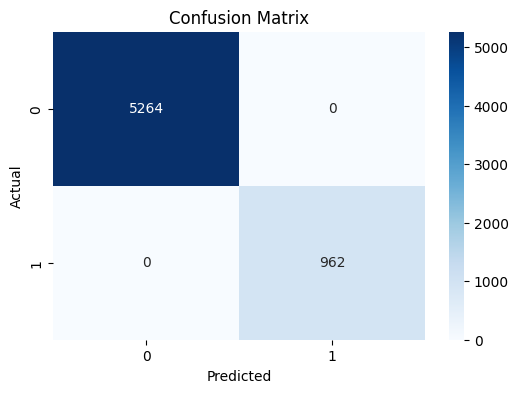

In [93]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
# Classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [94]:
import joblib

# Save model
joblib.dump(model, "churn_model.pkl")


['churn_model.pkl']

In [95]:
joblib.dump(list(X.columns), "feature_columns.pkl")


['feature_columns.pkl']

In [96]:
# Preferred Keras 3 format
model.save("churn_model.keras")
